# Problem Set 1

Joseph Nelson Farrell  
DS 5230 Unsupervised Machine Learning  
Professor Stevin Morin, PhD  
01-14-24
___

## Data Set Preperation

### Import Libraries  

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
import missingno as msno
from pathlib import Path
import os
from sklearn.preprocessing import LabelEncoder

___
### Read in Data

In [23]:
# set path to data
path = Path(os.getcwd())
path = str(path)

# file name
file = "assign_1_modified_iris_ds5230.csv"

# define col names
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# read in data
df = pd.read_csv(file, names = cols)

# display df
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor


___
### Display Dataset General Information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  143 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  144 non-null    float64
 3   petal_width   140 non-null    float64
 4   target        138 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


___

### Check for Missing Values in Target Vector

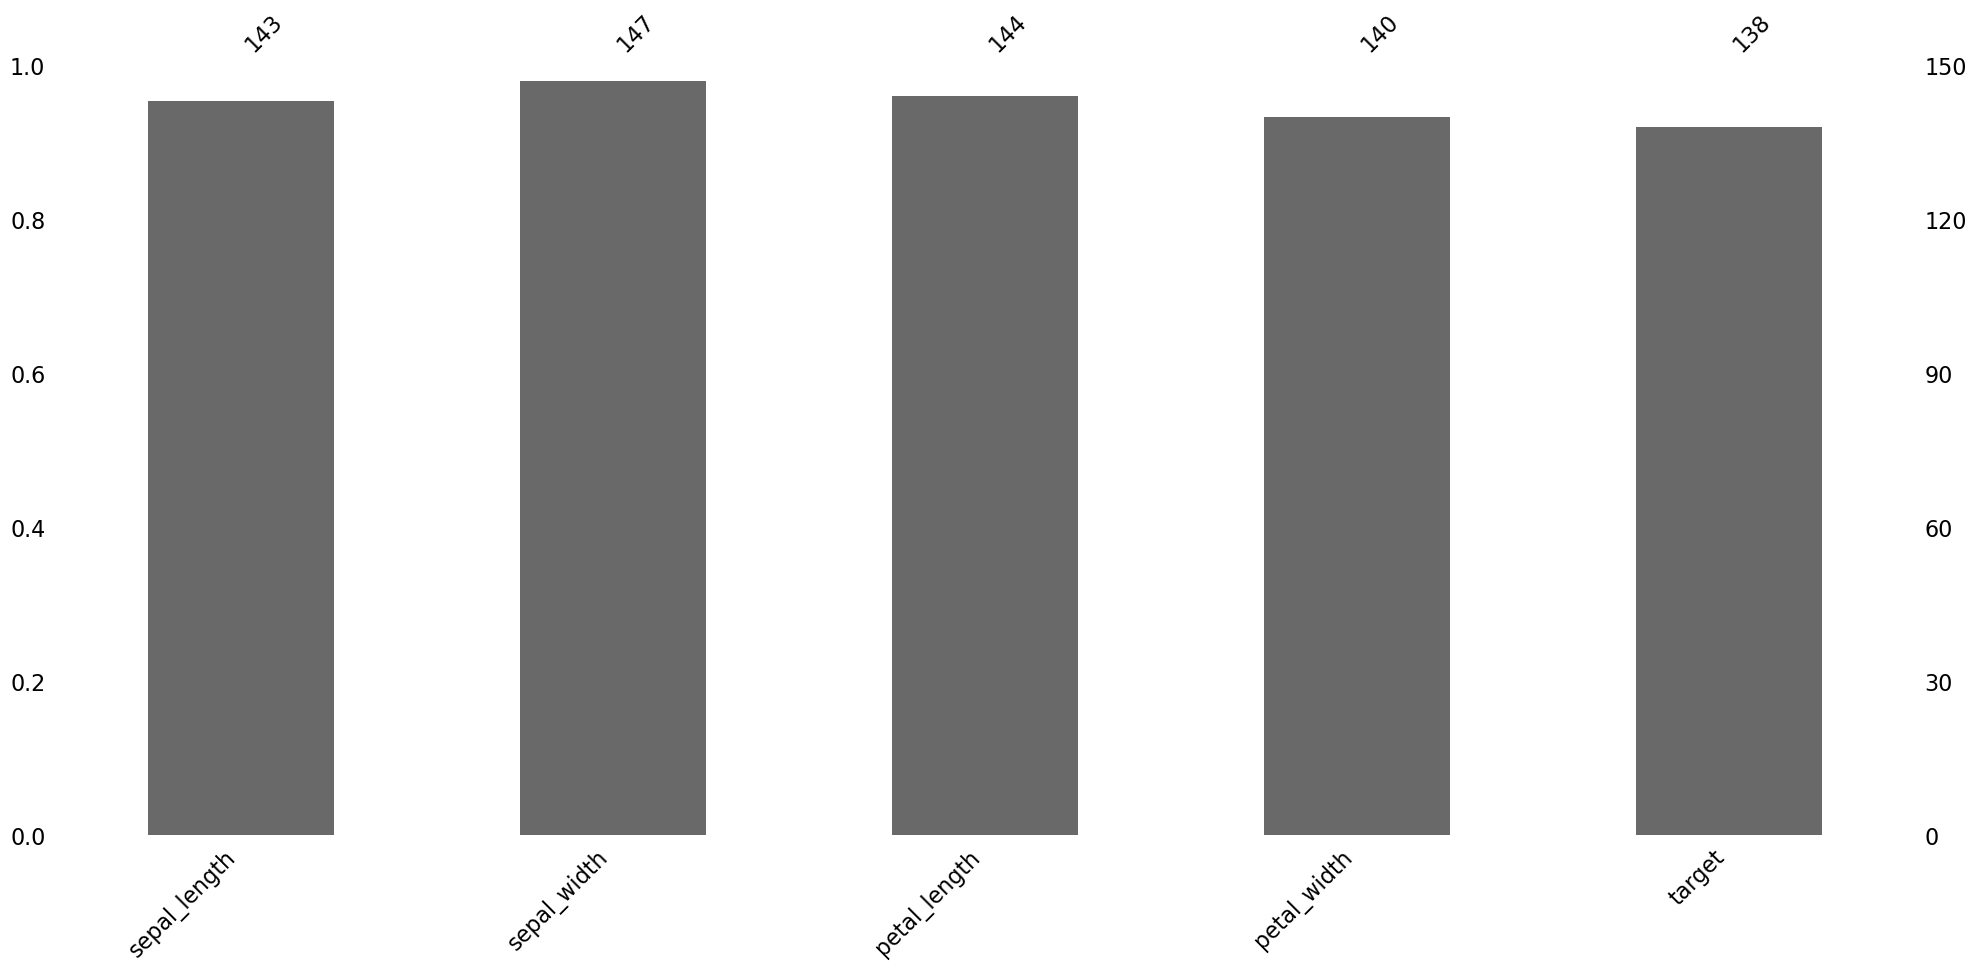

In [25]:
# display missing values
msno.bar(df);

In [26]:
# compute missing values numerically
missing = sum(df.target.isna())
total = df.shape[0]
percent_missing_target = missing/total

# print results
print(f'Total Observations: {total} \n'
      f'Missing Target: {missing} \n' 
      f'Percent Observations Missing Target: {percent_missing_target}%')

Total Observations: 150 
Missing Target: 12 
Percent Observations Missing Target: 0.08%


___
### Remove Observations with Missing Target Variable

In [27]:
# drop rows missing the target variable
df = df.dropna(subset = ['target'])

# verify
num_na_target = sum(df.target.isna())
print(f'Missing Values in the Target Vector: {num_na_target}')

Missing Values in the Target Vector: 0


___
### Add ID Attribute

In [28]:
# add col with unqiue values 1 to length of df + 1
df['id'] = np.arange(1, len(df) + 1)

# verify
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target,id
0,6.1,2.8,4.7,1.2,Iris-versicolor,1
1,5.7,3.8,1.7,0.3,Iris-setosa,2
2,7.7,2.6,6.9,2.3,Iris-virginica,3
3,6.0,2.9,4.5,1.5,Iris-versicolor,4
4,6.8,2.8,4.8,1.4,Iris-versicolor,5


___
### Separate Target & Design Matrix

In [29]:
# separte target and id 
target_df = df[['id', 'target']].copy()
print(target_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      138 non-null    int64 
 1   target  138 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None


In [30]:
# separate design matrix
design_df = df[['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
print(design_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            138 non-null    int64  
 1   sepal_length  131 non-null    float64
 2   sepal_width   136 non-null    float64
 3   petal_length  132 non-null    float64
 4   petal_width   129 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.5 KB
None


___
### Map Target Vector Strings to Numerical Values

In [31]:
# instantiate label encoder
le = LabelEncoder()

# encode target column
target_df['target_encoded'] = le.fit_transform(df.target)

# extract the precise mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# print mapping formula
print(mapping)

# extract mapped values and id
target_df = target_df[['id', 'target_encoded']]

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


### Mapping Key:  
The mapping procedure is as follows:  
* Iris-setosa $= 0$
* Iris-versicolor $= 1$
* Iris-virginica $= 2$ 

___
### Save Target Vector and Design Matrix

In [32]:
# target vector csv file path
file = "/iris_target.csv"

# save file
target_df.to_csv(path + file, index = False)

In [33]:
# target vector csv file path
file = "/iris_design.csv"

# save file
design_df.to_csv(path + file, index = False)

___
## Target Vector

### Display the Number of Classes in the Target Vector

In [34]:
# find num of unique values in target
num_unique = target_df.target_encoded.nunique()

# display
print(f'The number of classes in the target vector: {num_unique}')

The number of classes in the target vector: 3


___
## Design Matrix

### Determine the Size of the Design Matrix

In [35]:
# determine size of the design matrix
design_matrix_size = design_df.shape

# display
print(f'Design Matrix Size: {design_matrix_size}')

Design Matrix Size: (138, 5)


Design Matrix:
* 138 Rows
* 5 Columns

___
### Determine the Attribute Types of the Design Matrix

In [36]:
design_df.dtypes

id                int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

Column Datatypes: 

* sepal_length - (float64) - Ratio
* sepal_width - (float64) - Ratio
* petal_length - (float64) - Ratio
* petal_width - (float64) - Ratio

___
### Determine Missingness of Design Matrix

In [37]:
# find proportion of missing values
round(design_df.isna().sum()/design_df.shape[0], 3)

id              0.000
sepal_length    0.051
sepal_width     0.014
petal_length    0.043
petal_width     0.065
dtype: float64

In [38]:
design_df.isna().sum()

id              0
sepal_length    7
sepal_width     2
petal_length    6
petal_width     9
dtype: int64

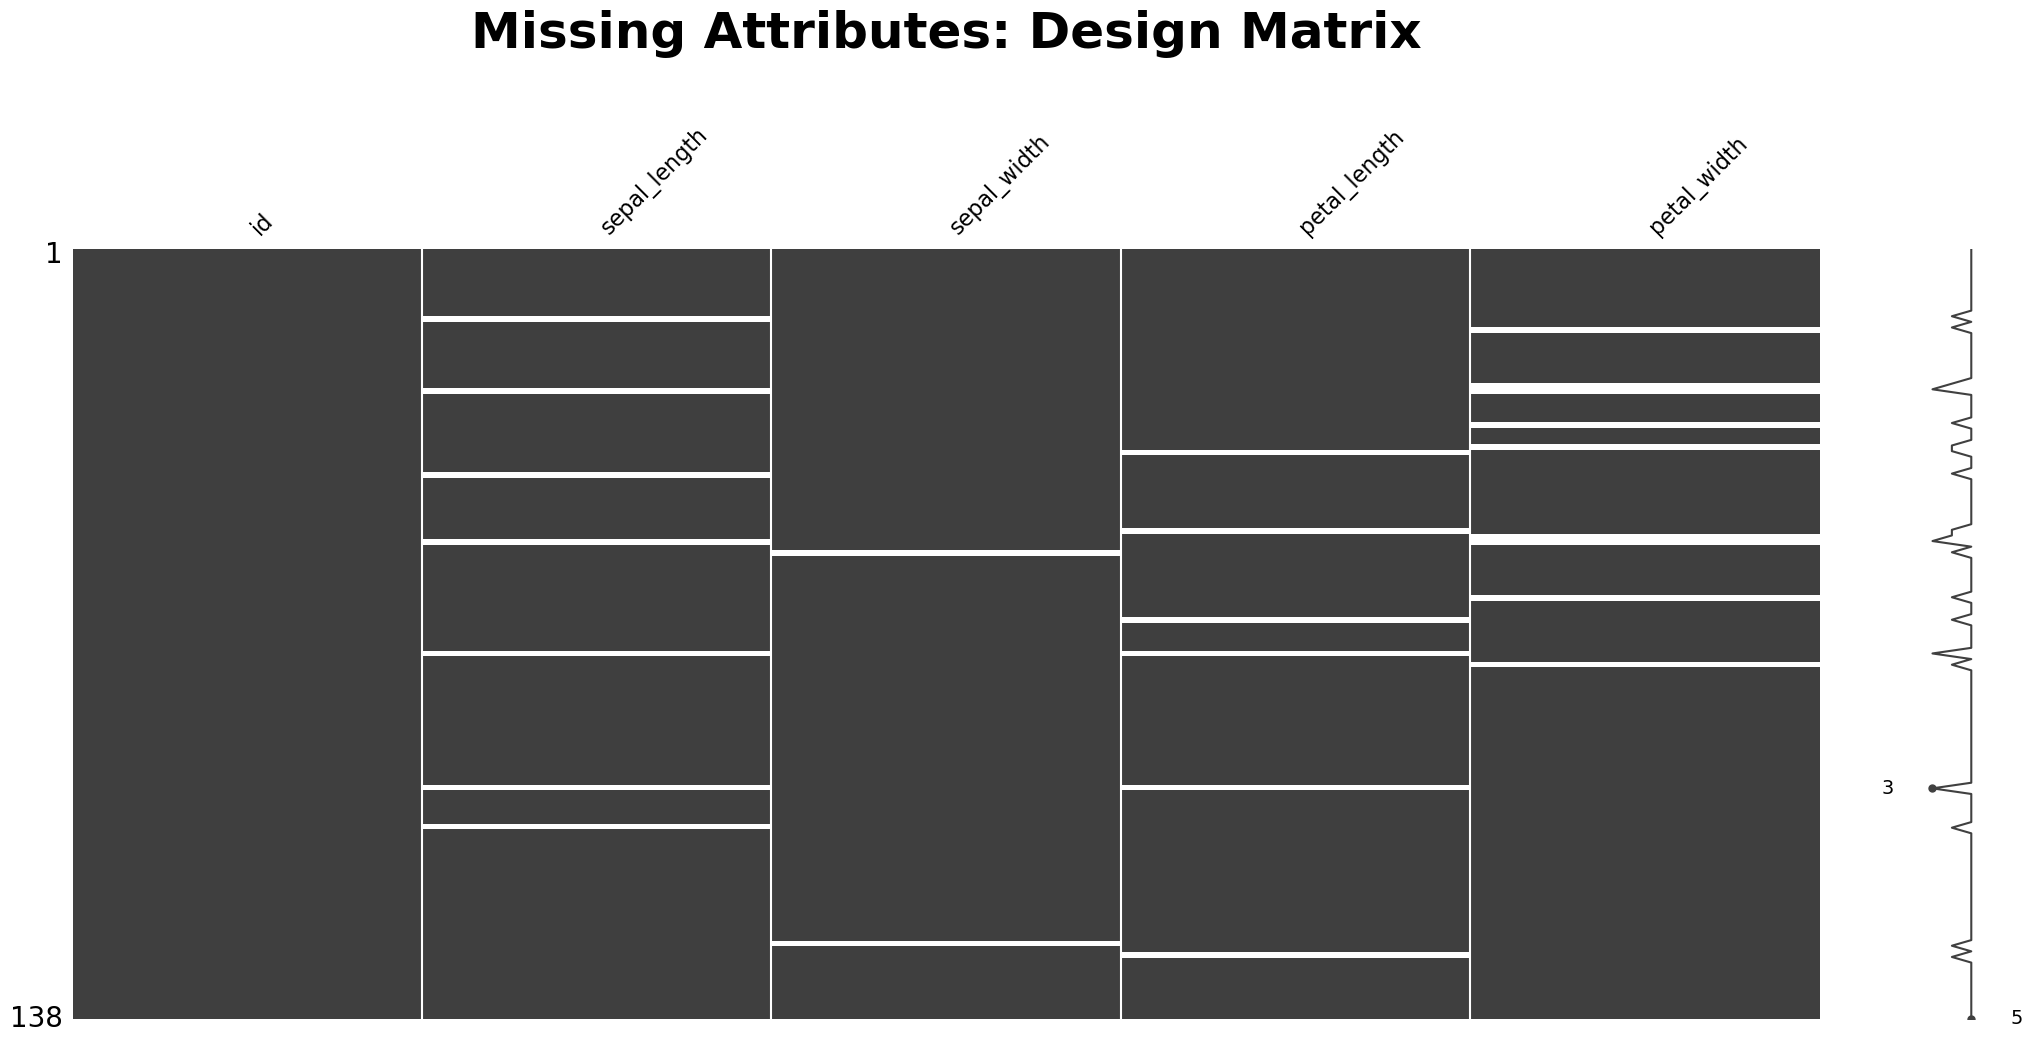

In [39]:
# display missingness visual
msno.matrix(design_df)
plt.title("Missing Attributes: Design Matrix", fontsize = 36, weight = 'bold', y = 1.25);

# save fig
plt.savefig(path + "/figs/missing_attributes_fig_1.png")

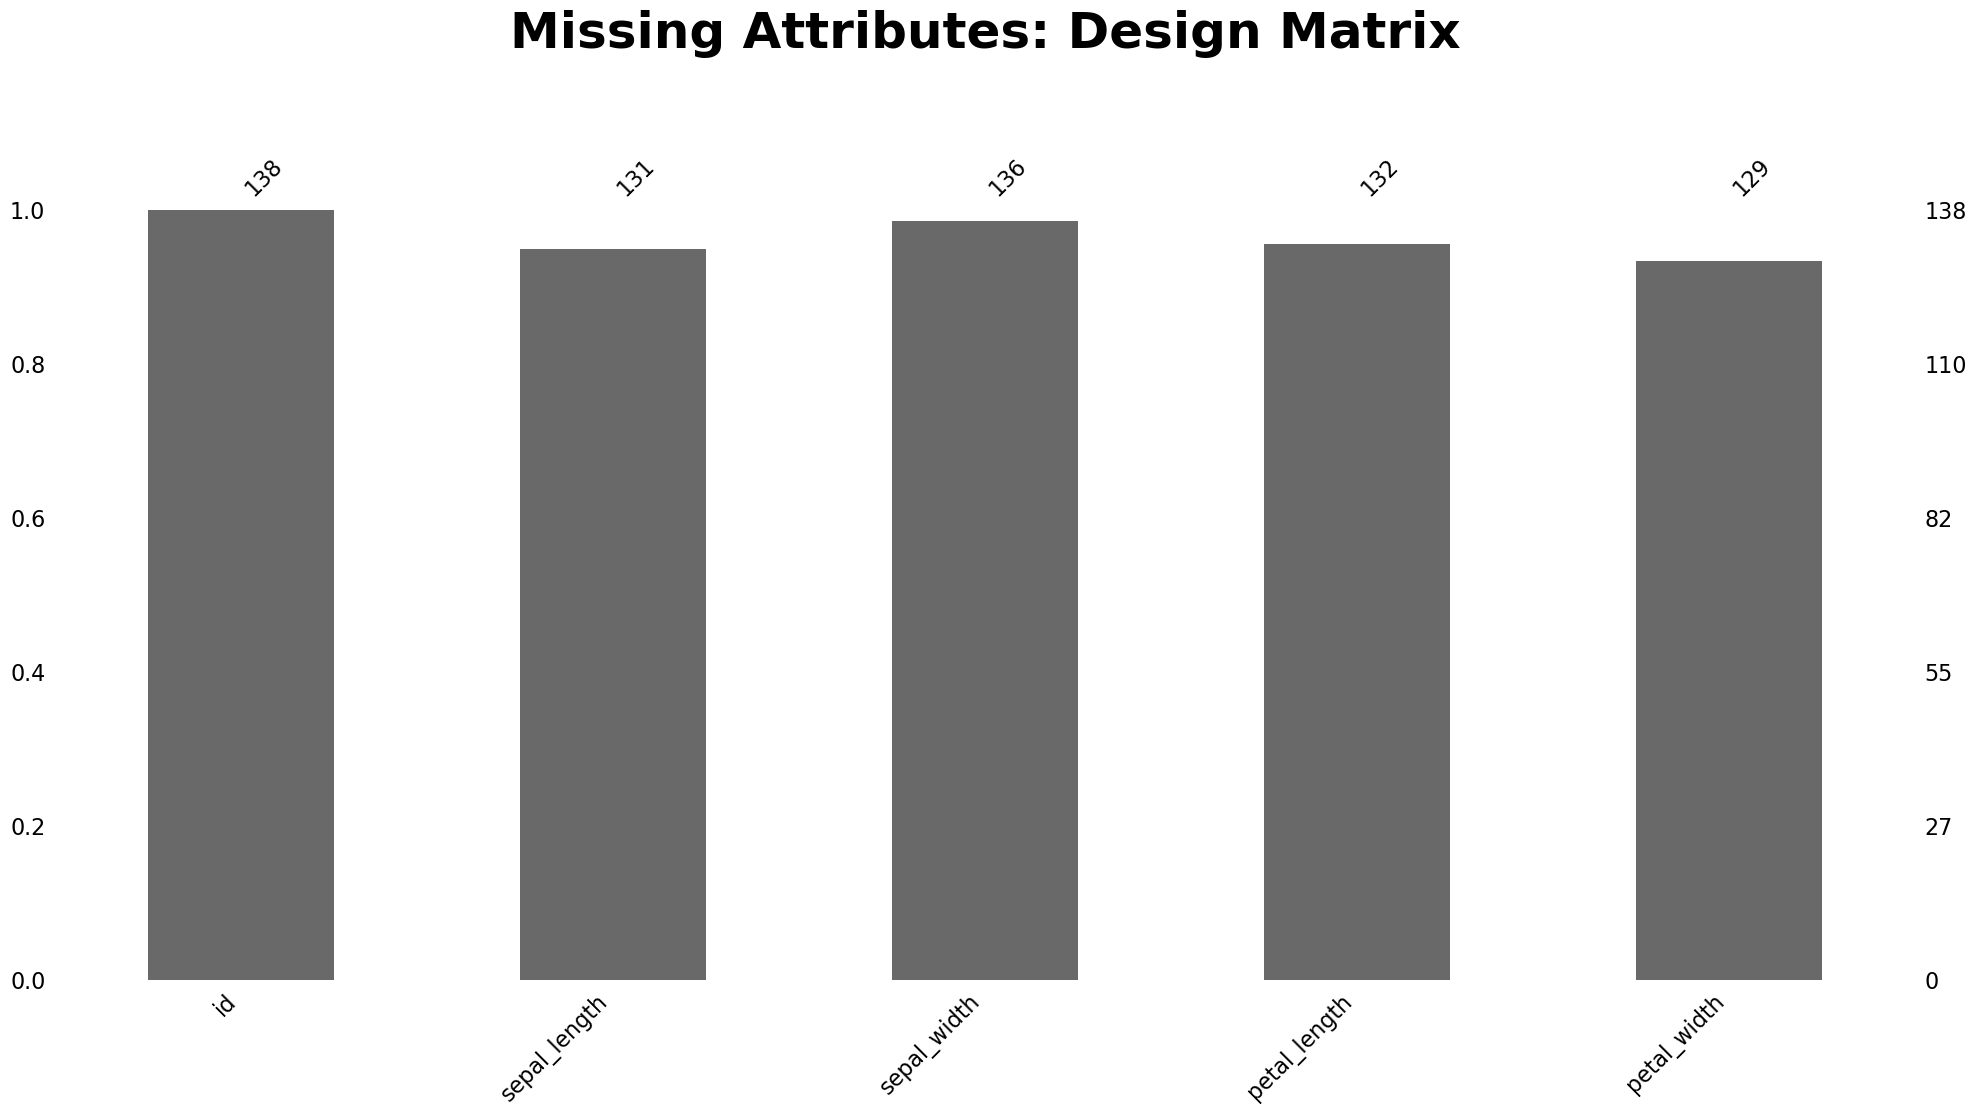

In [40]:
# display missingness visual
msno.bar(design_df)
plt.title("Missing Attributes: Design Matrix", fontsize = 36, weight = 'bold', y = 1.2);

# save fig
plt.savefig(path + "/figs/missing_attributes_fig_2.png")

___
### Pairplots: Design Matrix Attributes

/Users/nelsonfarrell/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nelsonfarrell/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nelsonfarrell/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nelsonfarrell/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcor

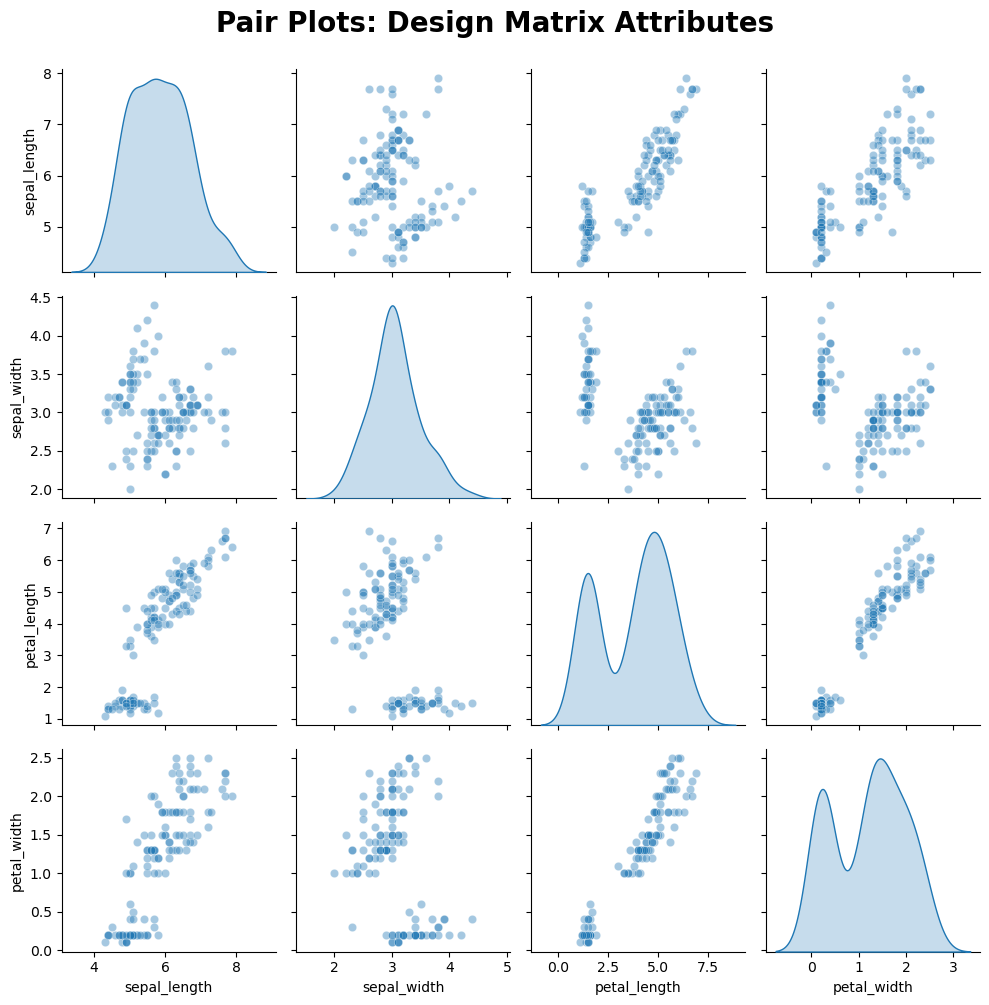

In [41]:
# generate pair plots with seaborn
sns.pairplot(design_df.iloc[:, 1:], diag_kind = 'kde', dropna = True, plot_kws = dict(alpha = 0.4) )
plt.suptitle("Pair Plots: Design Matrix Attributes", fontsize = 20, weight = 'bold', y = 1)
plt.tight_layout()

# save fig
plt.savefig(path + "/figs/pair_plots.png")

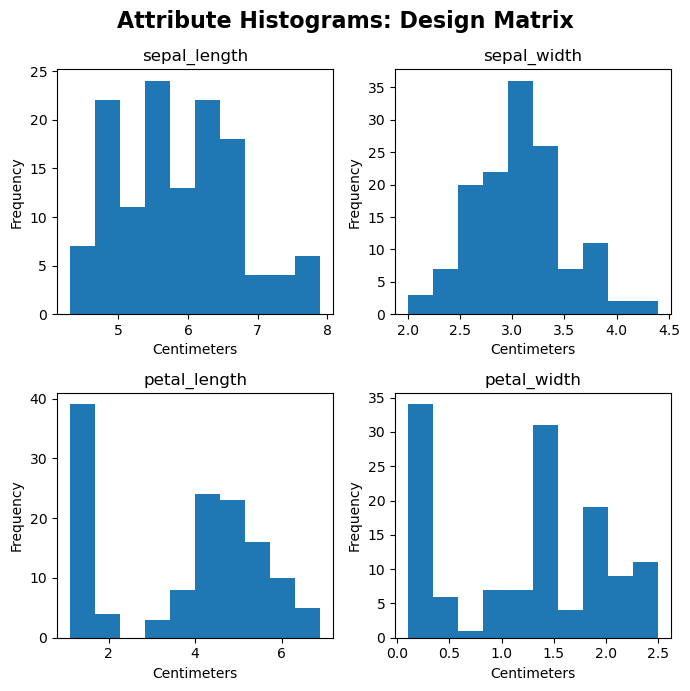

In [42]:
# generate histograms with matplotlib
fig, axes = plt.subplots(2, 2, figsize = (7,7), tight_layout = True)
fig.suptitle('Attribute Histograms: Design Matrix', weight = 'bold', fontsize = 16)
for index, (col, ax) in enumerate(zip(design_df.iloc[:, 1:].columns, axes.flatten())):
    ax.hist(design_df[col])
    ax.set_title(f'{col}')
    ax.set_xlabel('Centimeters')
    ax.set_ylabel("Frequency")

# save fig
plt.savefig(path + "/figs/attribute_histograms.png")